In [3]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import powerlaw

plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['figure.dpi'] = 150
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['axes.titlepad'] = 10


In [2]:
path = '/work/lpsha/data/regime/'
cities = os.listdir(path)

real_degree_sequence = np.array([])
for city in tqdm(cities):
        real_degree_sequence=np.append(real_degree_sequence, np.loadtxt(path+city))

100%|████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.20it/s]


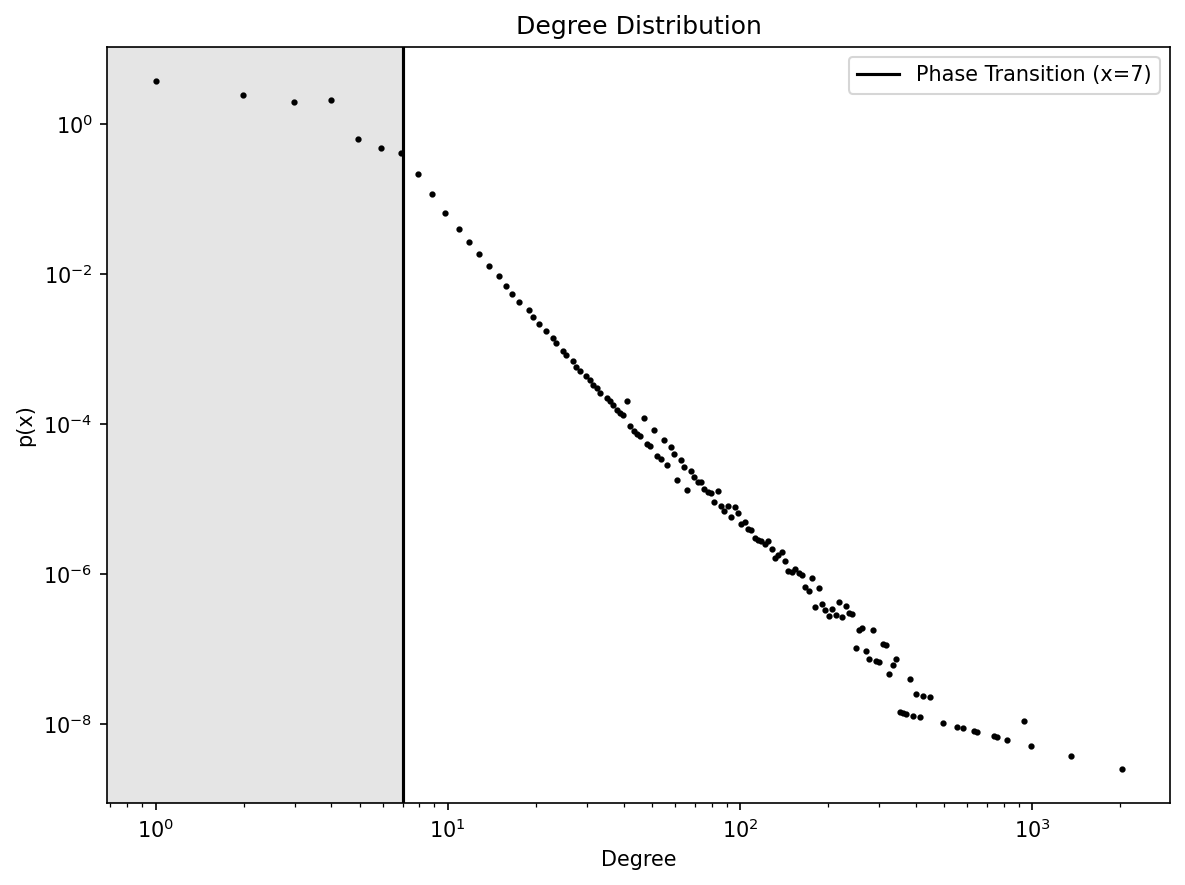

In [3]:
ps = 7
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6),dpi=150)

# Histogram data
# degree = df['merged_degree10'].values
y, x = np.histogram(real_degree_sequence, bins=np.logspace(0, np.log10(real_degree_sequence.max()), len(np.unique(real_degree_sequence))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
ax.scatter(x_nn, y_nn, alpha=1, zorder=2, color='k', label='Street Network',s=4)

# Add vertical line at x=7
ax.axvline(ps, color='k', label=f'Phase Transition (x={ps})')

# Add gray background to the left of x=7
ax.axvspan(0, ps, color='gray', alpha=0.2, zorder=1, label='Phase Shift Region')

# Log-log scaling and labels
ax.set_ylabel('p(x)')
ax.set_xlabel('Degree')
ax.set_xscale('log')
ax.set_yscale('log')

# Add legend
legend_elements = [
    ax.lines[0],  # Use the axvline's line as the legend entry
]
ax.legend(handles=legend_elements, loc='upper right')

plt.title("Degree Distribution")
plt.tight_layout()
plt.show()

In [16]:
# --- Nature-style aesthetics ---
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['figure.dpi'] = 150
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['axes.titlepad'] = 10


100%|████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 40.36it/s]


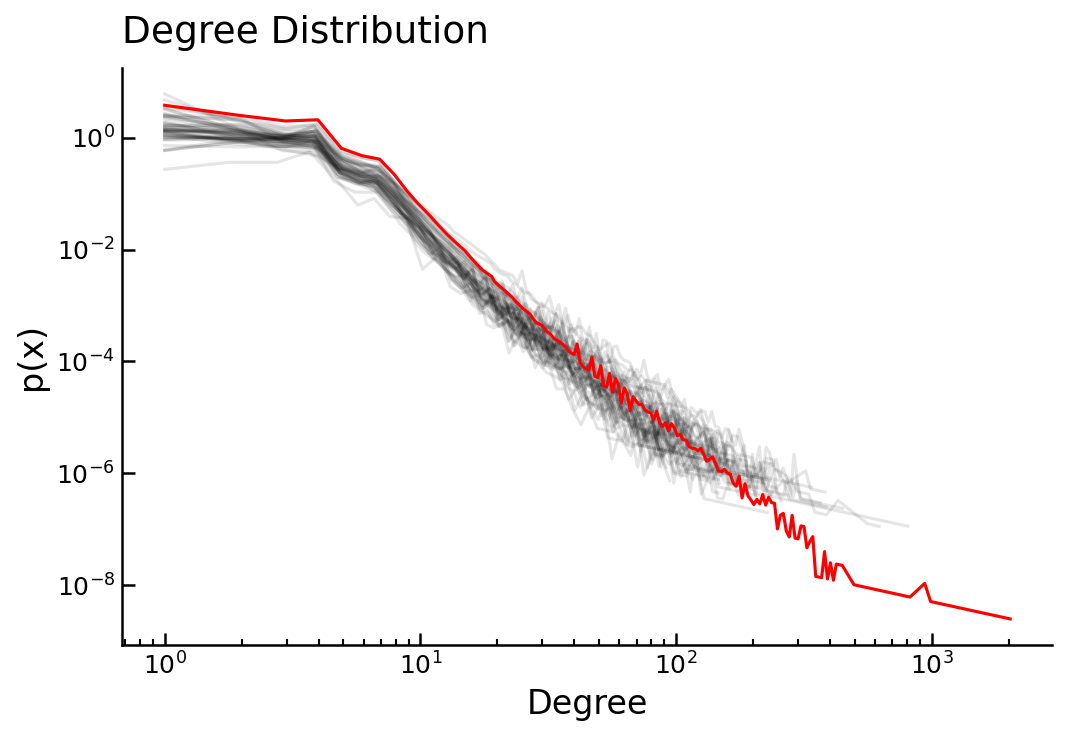

In [64]:
path = '/work/lpsha/data/regime/'

full = np.array([])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5),dpi=150)

cities = os.listdir(path)

for city in tqdm(cities):

    d=np.loadtxt(path+city)
    full=np.append(full, d)

    y, x = np.histogram(d, bins=np.logspace(0, np.log10(d.max()), len(np.unique(d))), density=True)
    x = x[:-1]
    x_nn = x[y != 0][:-1]
    y_nn = y[y != 0][:-1]
    ax.plot(x_nn, y_nn, alpha=0.1, zorder=2, color='k')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title("Degree Distribution", loc='left', pad=12)
ax.set_xlabel("Degree")
ax.set_ylabel("p(x)")

y, x = np.histogram(full, bins=np.logspace(0, np.log10(full.max()), len(np.unique(full))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
ax.plot(x_nn, y_nn, alpha=1, zorder=2, color='red')


# Hide top/right spines (Nature style)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only bottom/left axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Major ticks (not too many)
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0))
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0))

# Minor ticks
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))

# Appearance
ax.tick_params(which='major', length=6, width=1.2)
ax.tick_params(which='minor', length=3, width=1.0)

plt.show()

100%|████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 39.57it/s]


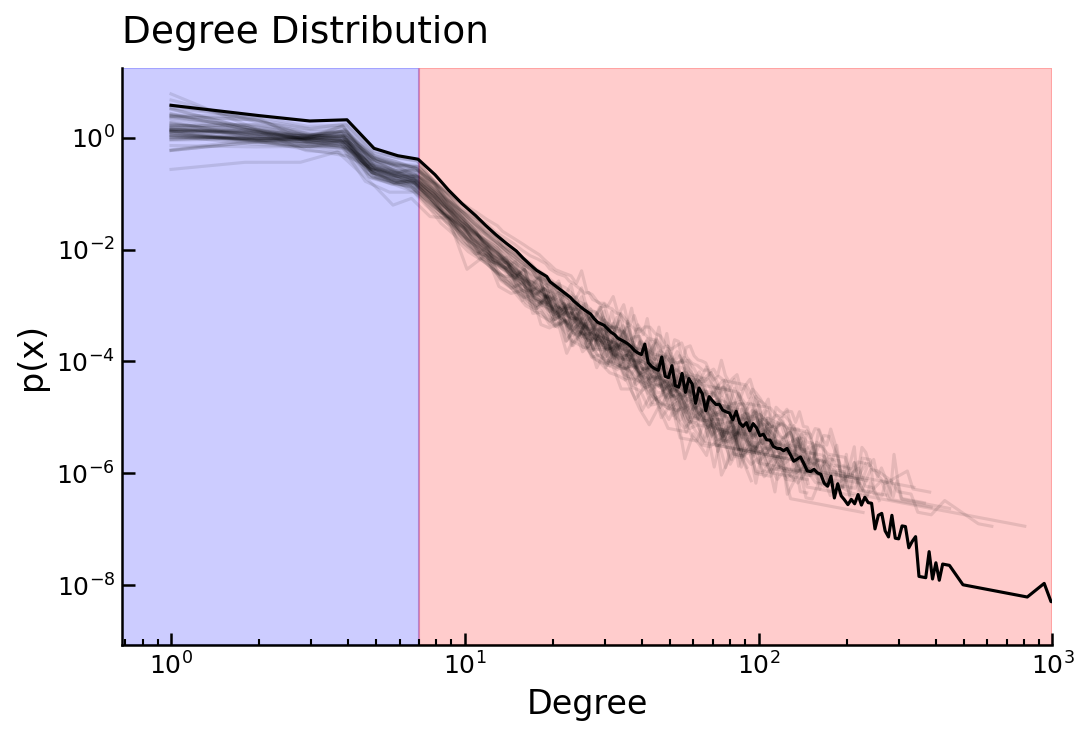

In [63]:
path = '/work/lpsha/data/regime/'

full = np.array([])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5),dpi=150)

cities = os.listdir(path)

for city in tqdm(cities):

    d=np.loadtxt(path+city)
    full=np.append(full, d)

    y, x = np.histogram(d, bins=np.logspace(0, np.log10(d.max()), len(np.unique(d))), density=True)
    x = x[:-1]
    x_nn = x[y != 0][:-1]
    y_nn = y[y != 0][:-1]
    ax.plot(x_nn, y_nn, alpha=0.1, zorder=2, color='k')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title("Degree Distribution", loc='left', pad=12)
ax.set_xlabel("Degree")
ax.set_ylabel("p(x)")

y, x = np.histogram(full, bins=np.logspace(0, np.log10(full.max()), len(np.unique(full))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
ax.plot(x_nn, y_nn, alpha=1, zorder=2, color='k')


# Hide top/right spines (Nature style)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only bottom/left axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Major ticks (not too many)
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0))
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0))

# Minor ticks
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))

# Appearance
ax.tick_params(which='major', length=6, width=1.2)
ax.tick_params(which='minor', length=3, width=1.0)

# Shade area from "x = 0" (small positive) up to x = 7
ax.axvspan(xmin=0, xmax=7, ymin=0, ymax=1, color='blue', alpha=0.2, zorder=-1)
ax.axvspan(xmin=7, xmax=1000, ymin=0, ymax=1, color='red', alpha=0.2, zorder=-1)
ax.set_xlim(right=1000)
plt.show()

In [18]:
def compute_ks(degree,min_range):
    distance = []
    ass = []
    for i_min in min_range:
        fit = powerlaw.Fit(degree,discrete=True,xmin=i_min)
        a = fit.alpha
        xmin = fit.xmin
        x_fit = degree[degree>xmin]
        
        distance.append(fit.power_law.D)
        ass.append(a) 

    return np.array(distance), min_range, ass

In [19]:
d=real_degree_sequence
d=d[d != 0]
ks_dist, xmins, a = compute_ks(d, range(1,50))

<function matplotlib.pyplot.show(close=None, block=None)>

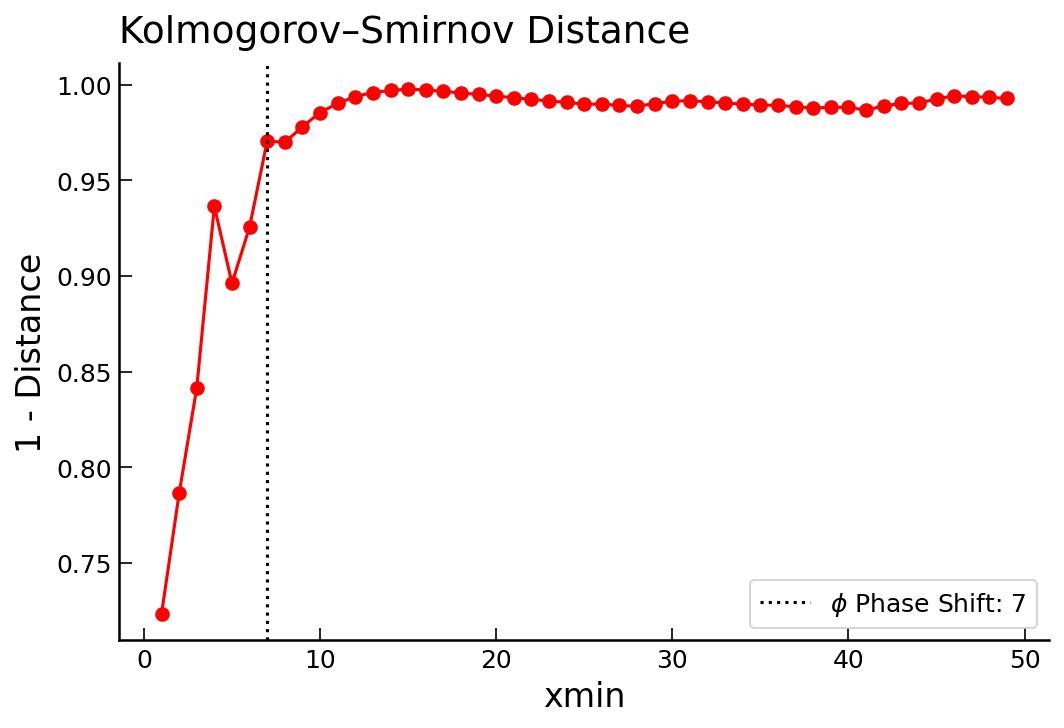

In [27]:
fig, ax2 = plt.subplots(nrows=1,ncols=1,dpi=150,figsize=(8,5))

shift=7

ax2.scatter(xmins,1-ks_dist,color='red')
ax2.plot(xmins,1-ks_dist,color='red')
ax2.axvline(shift,color='k',linestyle='dotted',label='$\phi$ Phase Shift: '+str(shift))
ax2.set_xlabel('xmin')
ax2.set_ylabel('1 - Distance')
ax2.legend()
ax2.set_title('Kolmogorov–Smirnov Distance',loc='left')


# Hide top/right spines (Nature style)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only bottom/left axes
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


plt.show

/tmp/ipykernel_217880/3004173513.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

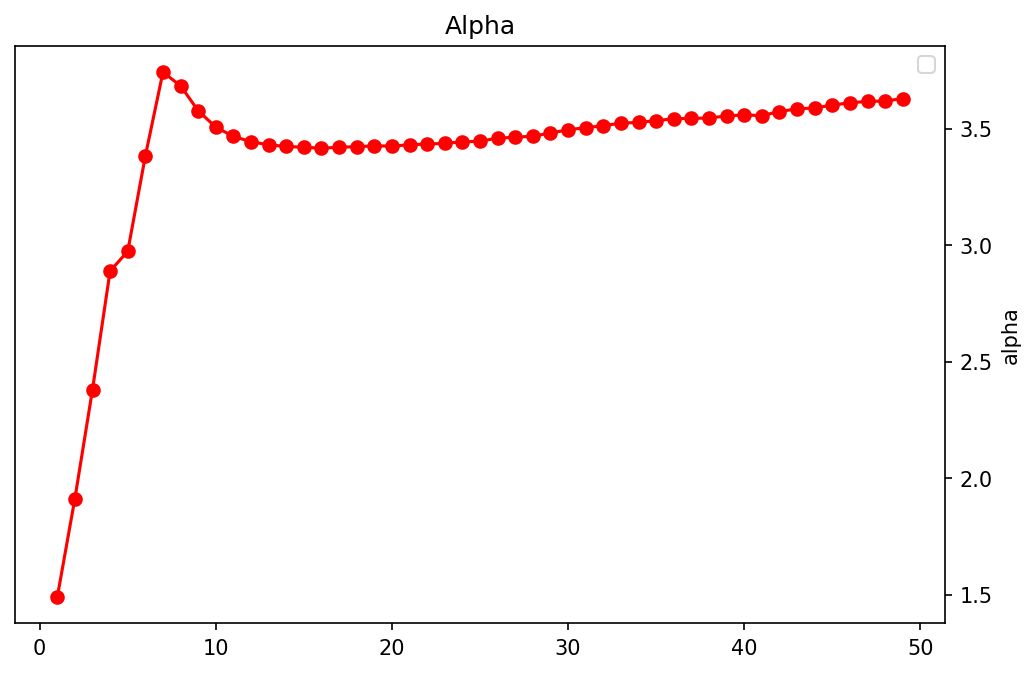

In [31]:
fig, ax2 = plt.subplots(nrows=1,ncols=1,dpi=150,figsize=(8,5))

shift=7

ax2.scatter(xmins,a,color='red')
ax2.plot(xmins,a,color='red')
# ax2.axvline(shift,color='k',linestyle='dotted',label='Phase Shift: '+str(shift))
# ax2.set_xlabel('xmin')
ax2.set_ylabel('alpha')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.legend()
ax2.set_title('Alpha')
plt.show

# V2

 13%|█▎        | 10/77 [00:00<00:00, 99.76it/s]

100%|██████████| 77/77 [00:01<00:00, 72.30it/s]


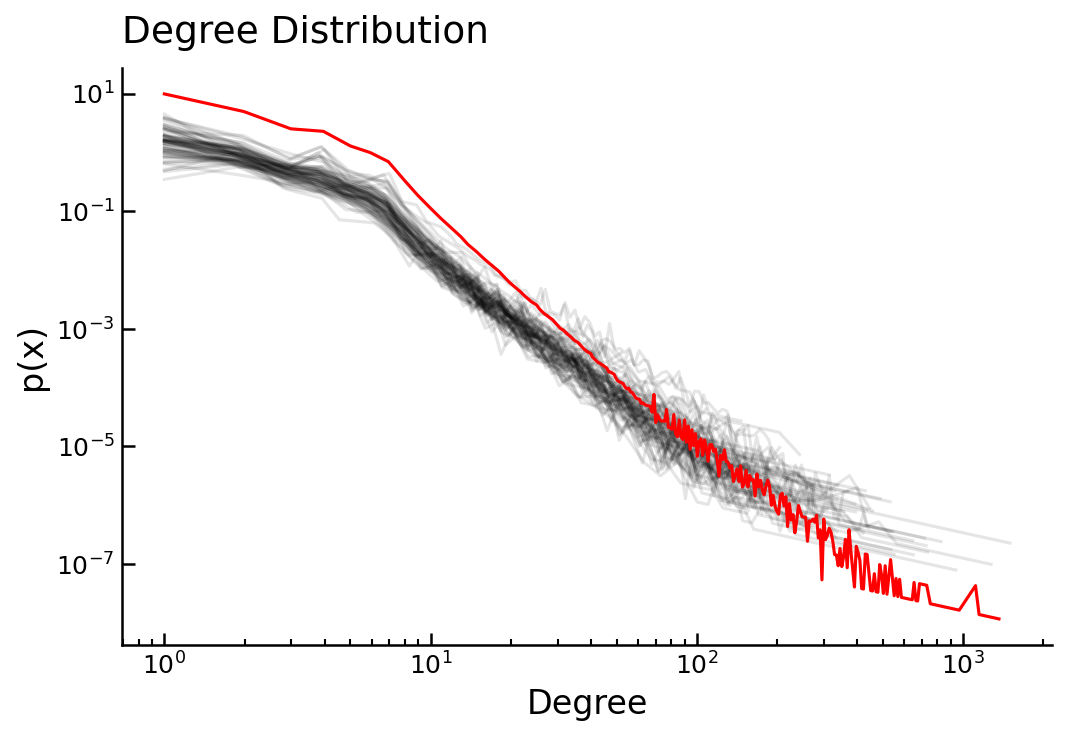

In [50]:
path = '/home/lpsha/s154446/fractality/data/city_degrees/t10_a20/'

full = np.array([])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5),dpi=150)

cities = os.listdir(path)

maxs = []

for city in tqdm(cities):

    d=np.loadtxt(path+city)
    full=np.append(full, d)
    mmax = d.max()
    y, x = np.histogram(d, bins=np.logspace(0, np.log10(mmax), len(np.unique(d))), density=True)
    x = x[:-1]
    x_nn = x[y != 0][:-1]
    y_nn = y[y != 0][:-1]
    ax.plot(x_nn, y_nn, alpha=0.1, zorder=2, color='k')
    maxs.append(np.max(x_nn))

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title("Degree Distribution", loc='left', pad=12)
ax.set_xlabel("Degree")
ax.set_ylabel("p(x)")

y, x = np.histogram(full, bins=np.logspace(0, np.log10(max(maxs)), len(np.unique(full))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
ax.plot(x_nn, y_nn, alpha=1, zorder=2, color='red')


# Hide top/right spines (Nature style)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only bottom/left axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Major ticks (not too many)
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0))
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0))

# Minor ticks
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))

# Appearance
ax.tick_params(which='major', length=6, width=1.2)
ax.tick_params(which='minor', length=3, width=1.0)

# ax.set_xlim(right=7e2)
plt.show()

100%|██████████| 77/77 [00:01<00:00, 73.47it/s] 


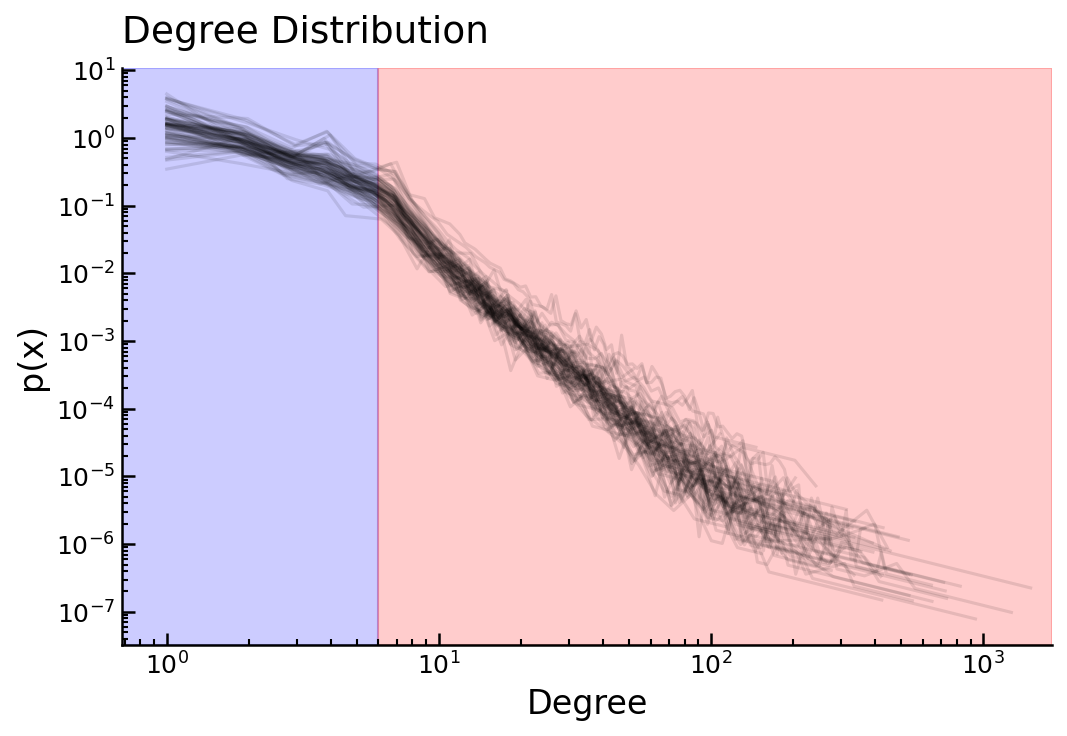

In [41]:
path = '/home/lpsha/s154446/fractality/data/city_degrees/t10_a20/'

full = np.array([])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5),dpi=150)

cities = os.listdir(path)

for city in tqdm(cities):

    d=np.loadtxt(path+city)
    full=np.append(full, d)

    y, x = np.histogram(d, bins=np.logspace(0, np.log10(d.max()), len(np.unique(d))), density=True)
    x = x[:-1]
    x_nn = x[y != 0][:-1]
    y_nn = y[y != 0][:-1]
    ax.plot(x_nn, y_nn, alpha=0.1, zorder=2, color='k')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title("Degree Distribution", loc='left', pad=12)
ax.set_xlabel("Degree")
ax.set_ylabel("p(x)")

y, x = np.histogram(full, bins=np.logspace(0, np.log10(full.max()), len(np.unique(full))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
# ax.plot(x_nn, y_nn, alpha=1, zorder=2, color='k')


# Hide top/right spines (Nature style)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only bottom/left axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Major ticks (not too many)
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0))
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0))

# Minor ticks
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))

# Appearance
ax.tick_params(which='major', length=6, width=1.2)
ax.tick_params(which='minor', length=3, width=1.0)

# Shade area from "x = 0" (small positive) up to x = 7
ax.axvspan(xmin=0, xmax=6, ymin=0, ymax=1, color='blue', alpha=0.2, zorder=-1)
ax.axvspan(xmin=6, xmax=1800, ymin=0, ymax=1, color='red', alpha=0.2, zorder=-1)
ax.set_xlim(right=1800)
plt.show()

In [54]:
def compute_ks(degree,min_range):
    distance = []
    ass = []
    for i_min in min_range:
        fit = powerlaw.Fit(degree,discrete=True,xmin=i_min)
        a = fit.alpha
        xmin = fit.xmin
        x_fit = degree[degree>xmin]
        
        distance.append(fit.power_law.D)
        ass.append(a) 

    return np.array(distance), min_range, ass

path = '/home/lpsha/s154446/fractality/data/city_degrees/t10_a20/'
cities = os.listdir(path)
real_degree_sequence = np.array([])
for city in tqdm(cities):
    real_degree_sequence=np.append(real_degree_sequence, np.loadtxt(path+city))

d=real_degree_sequence
d=d[d != 0]
ks_dist, xmins, a = compute_ks(d, range(1,50))

100%|██████████| 77/77 [00:00<00:00, 82.46it/s] 


<function matplotlib.pyplot.show(close=None, block=None)>

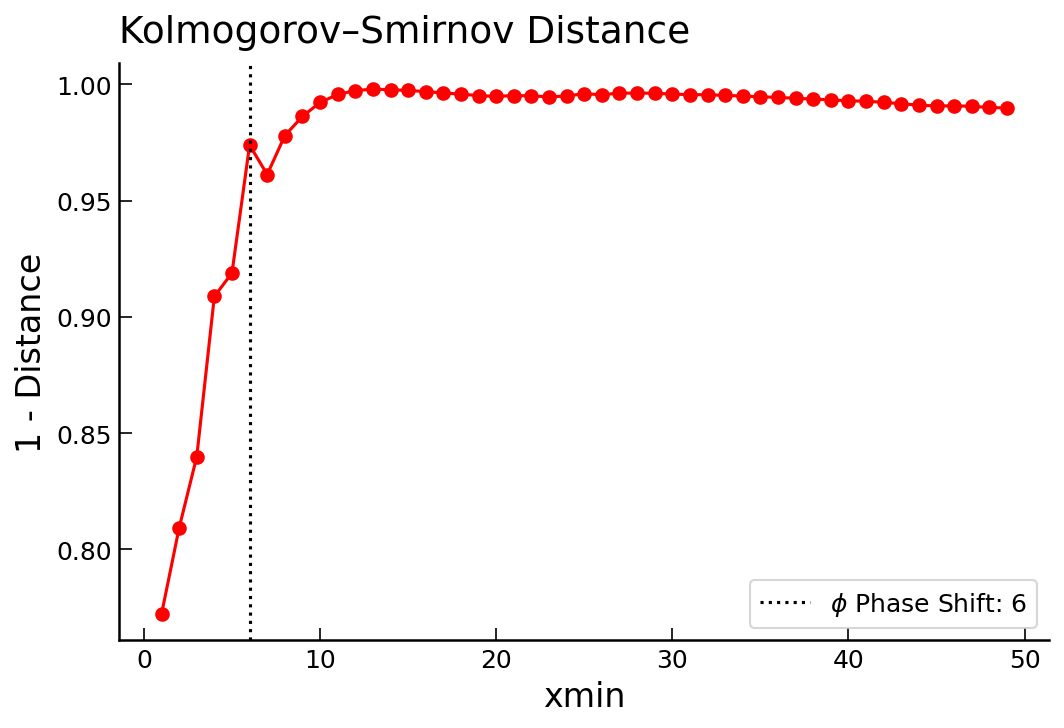

In [43]:
fig, ax2 = plt.subplots(nrows=1,ncols=1,dpi=150,figsize=(8,5))

shift=6

ax2.scatter(xmins,1-ks_dist,color='red')
ax2.plot(xmins,1-ks_dist,color='red')
ax2.axvline(shift,color='k',linestyle='dotted',label='$\phi$ Phase Shift: '+str(shift))
ax2.set_xlabel('xmin')
ax2.set_ylabel('1 - Distance')
ax2.legend()
ax2.set_title('Kolmogorov–Smirnov Distance',loc='left')


# Hide top/right spines (Nature style)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only bottom/left axes
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
plt.show

  0%|          | 0/77 [00:00<?, ?it/s]

100%|██████████| 77/77 [00:07<00:00, 10.77it/s]


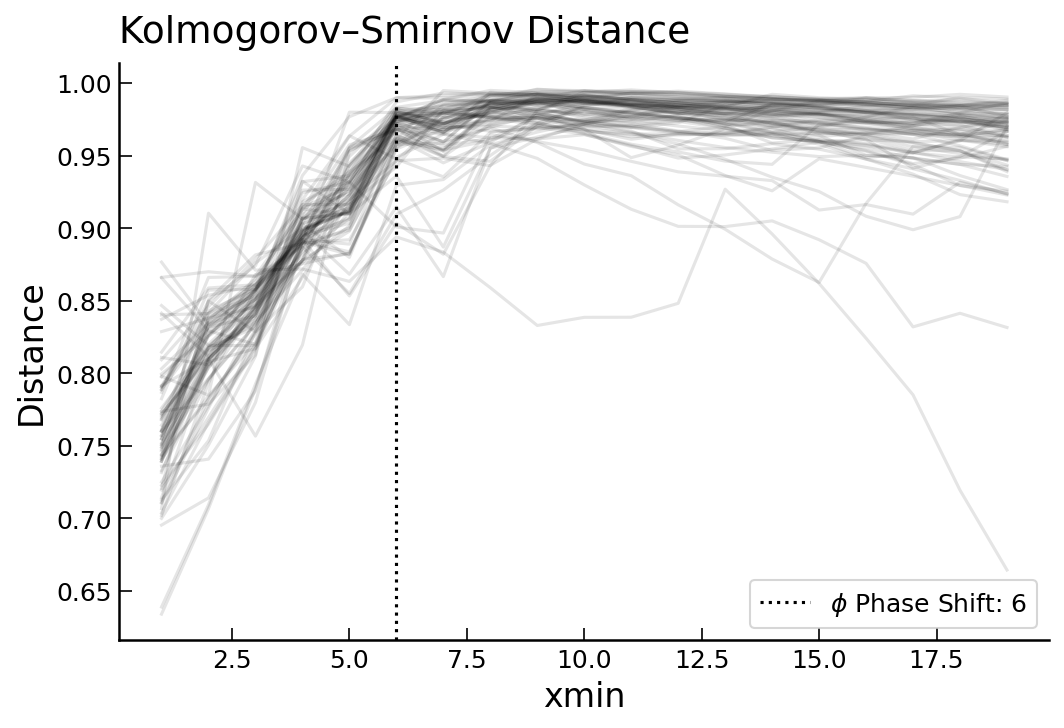

In [65]:
fig, ax2 = plt.subplots(nrows=1,ncols=1,dpi=150,figsize=(8,5))

path = '/home/lpsha/s154446/fractality/data/city_degrees/t10_a20/'
cities = os.listdir(path)
ks_dists = []
alphas = []
for city in tqdm(cities):
    d=np.loadtxt(path+city)
    d=d[d != 0]
    ks_dist, xmins, a = compute_ks(d, range(1,20))
    ks_dists.append(ks_dist)

    alphas.append(a)
    ax2.plot(xmins,1-ks_dist,color='k',alpha=0.1)


shift=6

ax2.axvline(shift,color='k',linestyle='dotted',label='$\phi$ Phase Shift: '+str(shift))
ax2.set_xlabel('xmin')
ax2.set_ylabel('Distance')
ax2.legend()
ax2.set_title('Kolmogorov–Smirnov Distance',loc='left')
# Hide top/right spines (Nature style)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Only bottom/left axes
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')    

plt.show()

In [94]:
path = '/home/lpsha/s154446/fractality/data/city_degrees/t10_a20/'
cities = os.listdir(path)
ks_dists = []
for city in tqdm(cities):
    d=np.loadtxt(path+city)
    d=d[d != 0]
    ks_dist, xmins, a = compute_ks(d, range(1,20))
    ks_dists.append(ks_dist)

100%|██████████| 77/77 [00:07<00:00, 10.92it/s]


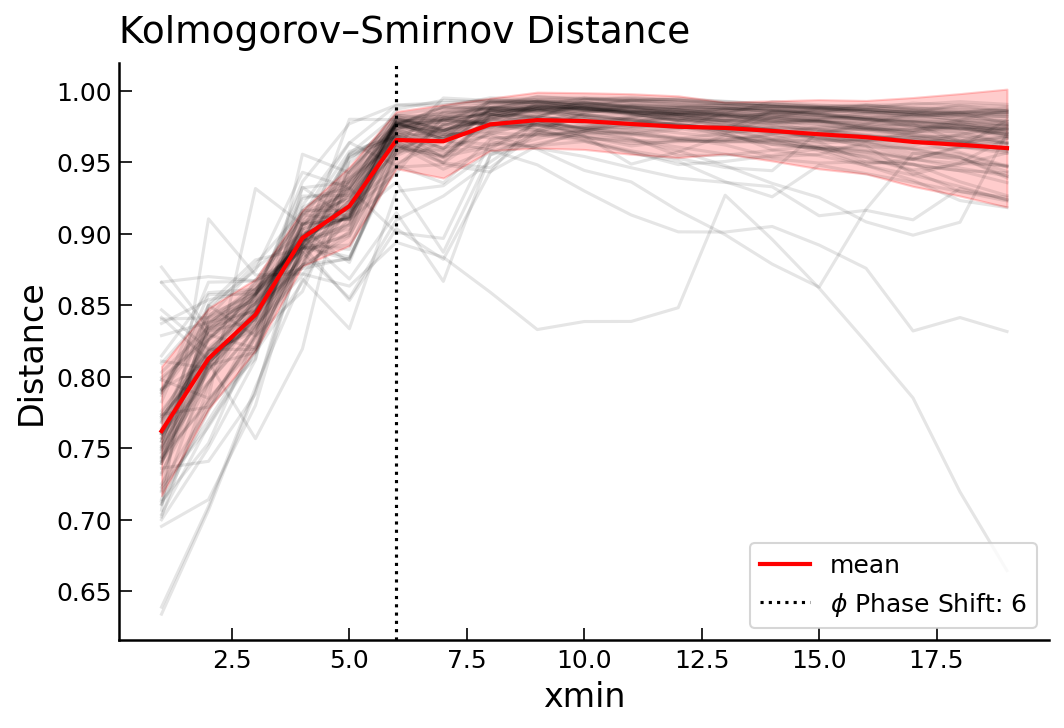

In [95]:
fig, ax2 = plt.subplots(nrows=1,ncols=1,dpi=150,figsize=(8,5))

for ks_dist in ks_dists:
    ax2.plot(xmins,1-ks_dist,color='k',alpha=0.1)

ax2.plot(xmins,1-np.mean(ks_dists,axis=0),color='red',linewidth=2,label='mean')
ax2.fill_between(xmins,1-np.mean(ks_dists,axis=0)-np.std(ks_dists,axis=0),
                 1-np.mean(ks_dists,axis=0)+np.std(ks_dists,axis=0),
                 color='red',alpha=0.2)

shift=6

ax2.axvline(shift,color='k',linestyle='dotted',label='$\phi$ Phase Shift: '+str(shift))
ax2.set_xlabel('xmin')
ax2.set_ylabel('Distance')
ax2.legend(loc='lower right')
ax2.set_title('Kolmogorov–Smirnov Distance',loc='left')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Only bottom/left axes
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')    

plt.show()

Perth, Australia.out


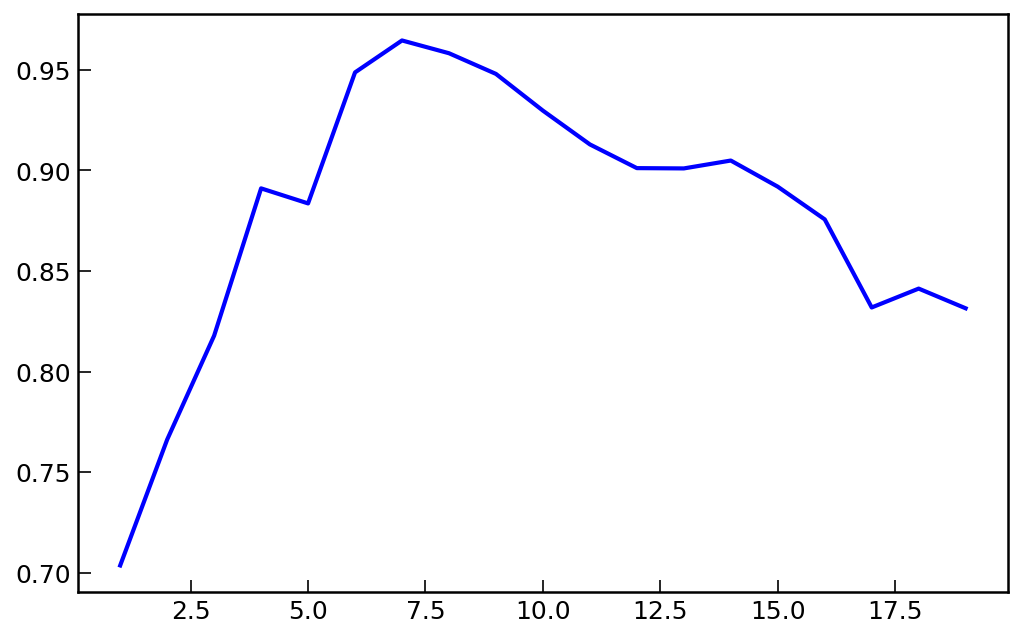

In [130]:
deltas = []

for ks_dist in ks_dists:
    delta=abs(ks_dist[6]-np.mean(ks_dists,axis=0)[6])
    deltas.append(delta)

mm = np.argsort(deltas)[1]
# mm = 46
print(cities[mm])


fig, ax2 = plt.subplots(nrows=1,ncols=1,dpi=150,figsize=(8,5))
plt.plot(xmins,1-ks_dists[mm],color='blue',label='Max Divergence City',linewidth=2)